In [1]:
import numpy as np
from nim_env import NimEnv, OptimalPlayer

# Nim environment

Our 2nd game is the famous game of Nim. You can read about the game and its rules here: https://en.wikipedia.org/wiki/Nim

**Important note:** We consider the normal (i.e. not misere) game: the player taking the last object *wins*.

We implemented the game as an environment in the style of games in the [Python GYM library](https://gym.openai.com/). The commented source code is available in the file "nim_env.py". Here, we give a brief introduction to the environment and how it can be used.

### Initialization and attributes

Given a random seed, you can initialize the environment / game in a random state (3 heaps with between 1 to 7 sticks in each heap) as following:

In [2]:
env = NimEnv(seed = 3)

Which then has the following attributes with the corresponding initial values:

In [3]:
env.__dict__

{'n_heap': 3,
 'n_agents': 2,
 'current_player': 0,
 'winner': None,
 'end': False,
 'num_step': 0,
 'heaps': [2, 5, 6],
 'heap_avail': [True, True, True],
 'heap_keys': ['1', '2', '3']}

The game is played by two players: player 0 and player 1. The attribute 'current_player' shows whose turn it is. We assume that player 0 always plays first.

The attribute 'heaps' is a numpy array of size 3 and presents the board in the real game and the state $s_t$ in the reinfocement learning language. Each number shows available number of sticks in each heap. The attribute 'heap_avail' shows which heaps can be used. 
        
The attribute 'end' shows if the game is over or not, and the attribute 'winner' shows the winner of the game.

You can use function 'render' to visualize the current position of the board:

In [4]:
env.render()

───────────────────────────────────
Heap 1: ||              	 (2)
───────────────────────────────────
Heap 2: |||||           	 (5)
───────────────────────────────────
Heap 3: ||||||          	 (6)
───────────────────────────────────


### Taking actions

The game environment will recieve action from two players in turn and update the heaps. At each time, one player can take the action $a_t$, where $a_t$=action can is a vector of 2 integer: action[0] $\in \{ 1,2,3 \}$ is the number of heap and action[1] > 0 the number of sticks to be taken from that heap.

Function 'step' is used to recieve the action of the player, update the grid:

In [5]:
env.step([1,2])

([0, 5, 6], False, None)

In [6]:
env.render()

───────────────────────────────────
Heap 1:                 	 (0)
───────────────────────────────────
Heap 2: |||||           	 (5)
───────────────────────────────────
Heap 3: ||||||          	 (6)
───────────────────────────────────


In [7]:
env.__dict__

{'n_heap': 3,
 'n_agents': 2,
 'current_player': 1,
 'winner': None,
 'end': False,
 'num_step': 1,
 'heaps': [0, 5, 6],
 'heap_avail': [False, True, True],
 'heap_keys': ['1', '2', '3']}

In [8]:
env.step([2,3])

([0, 2, 6], False, None)

In [9]:
env.render()

───────────────────────────────────
Heap 1:                 	 (0)
───────────────────────────────────
Heap 2: ||              	 (2)
───────────────────────────────────
Heap 3: ||||||          	 (6)
───────────────────────────────────


In [10]:
env.__dict__

{'n_heap': 3,
 'n_agents': 2,
 'current_player': 0,
 'winner': None,
 'end': False,
 'num_step': 2,
 'heaps': [0, 2, 6],
 'heap_avail': [False, True, True],
 'heap_keys': ['1', '2', '3']}

But not all actions are available at each time: One cannot take sticks from an unavailable action is taken. There is an error if an unavailable action is taken:

In [11]:
env.step([2,3])

AssertionError: You cannot take more objects than there are in the heap

Not taking any stick is also unavailable:

In [12]:
env.step([2,0])

AssertionError: You must take at least 1 object from the heap

### Reward

Reward is always 0 until the end of the game. When the game is over, the reward is 1 if you win the game and -1 if you lose. Function 'observe' can be used after each step to recieve the new state $s_t$, whether the game is over, and the winner, and function 'reward' to get the reward value $r_t$:

In [13]:
env.observe()

([0, 2, 6], False, None)

In [14]:
env.reward(player=0)

0

In [15]:
env.reward(player=1)

0

An example of finishing the game:

In [16]:
print("Player = " + str(env.current_player))
env.step([2,2])
env.render()
print("Player = " + str(env.current_player))
env.step([3,6])
env.render()

Player = 0
───────────────────────────────────
Heap 1:                 	 (0)
───────────────────────────────────
Heap 2:                 	 (0)
───────────────────────────────────
Heap 3: ||||||          	 (6)
───────────────────────────────────
Player = 1
───────────────────────────────────
Heap 1:                 	 (0)
───────────────────────────────────
Heap 2:                 	 (0)
───────────────────────────────────
Heap 3:                 	 (0)
───────────────────────────────────


In [17]:
env.observe()

([0, 0, 0], True, 1)

In [18]:
env.reward(player=0)

-1

In [19]:
env.reward(player=1)

1

# Optimal policy for the Nim environment

Fortunately, we know the exact optimal policy for Nim. We have implemented and $\epsilon$-greedy version of optimal polciy which you can use for the project.

In [20]:
env.reset(seed=6);

In [21]:
env.render()

───────────────────────────────────
Heap 1: |||||||         	 (7)
───────────────────────────────────
Heap 2: |||||           	 (5)
───────────────────────────────────
Heap 3: |               	 (1)
───────────────────────────────────


In [22]:
env.__dict__

{'n_heap': 3,
 'n_agents': 2,
 'current_player': 0,
 'winner': None,
 'end': False,
 'num_step': 0,
 'heaps': [7, 5, 1],
 'heap_avail': [True, True, True],
 'heap_keys': ['1', '2', '3']}

In [23]:
opt_player = OptimalPlayer(epsilon = 0., player = 0)

In [24]:
opt_player.act(env.heaps)

[1, 3]

In [25]:
opt_player.player

0

### An example of optimal player playing against random player

In [26]:
Turns = np.array([0,1])
for i in range(5):
    env.reset()
    heaps, _, __ = env.observe()
    Turns = Turns[np.random.permutation(2)]
    player_opt = OptimalPlayer(epsilon=0., player=Turns[0])
    player_rnd = OptimalPlayer(epsilon=1., player=Turns[1])
    while not env.end:
        if env.current_player == player_opt.player:
            move = player_opt.act(heaps)
        else:
            move = player_rnd.act(heaps)

        heaps, end, winner = env.step(move)

        if end:
            print('-------------------------------------------')
            print('Game end, winner is player ' + str(winner))
            print('Optimal player = ' +  str(Turns[0]))
            print('Random player = ' +  str(Turns[1]))
            env.reset()
            break


-------------------------------------------
Game end, winner is player 0
Optimal player = 1
Random player = 0
-------------------------------------------
Game end, winner is player 0
Optimal player = 0
Random player = 1
-------------------------------------------
Game end, winner is player 1
Optimal player = 1
Random player = 0
-------------------------------------------
Game end, winner is player 0
Optimal player = 0
Random player = 1
-------------------------------------------
Game end, winner is player 1
Optimal player = 1
Random player = 0


### An example of optimal player playing against optimal player

In [27]:
Turns = np.array([0,1])
for i in range(5):
    env.reset()
    heaps, _, __ = env.observe()
    Turns = Turns[np.random.permutation(2)]
    player_opt_1 = OptimalPlayer(epsilon=0., player=Turns[0])
    player_opt_2 = OptimalPlayer(epsilon=0., player=Turns[1])
    while not env.end:
        if env.current_player == player_opt_1.player:
            move = player_opt_1.act(heaps)
        else:
            move = player_opt_2.act(heaps)

        heaps, end, winner = env.step(move)

        if end:
            print('-------------------------------------------')
            print('Game end, winner is player ' + str(winner))
            print('Optimal player 1 = ' +  str(Turns[0]))
            print('Optimal player 2 = ' +  str(Turns[1]))
            env.reset()
            break


-------------------------------------------
Game end, winner is player 0
Optimal player 1 = 0
Optimal player 2 = 1
-------------------------------------------
Game end, winner is player 0
Optimal player 1 = 0
Optimal player 2 = 1
-------------------------------------------
Game end, winner is player 0
Optimal player 1 = 0
Optimal player 2 = 1
-------------------------------------------
Game end, winner is player 0
Optimal player 1 = 0
Optimal player 2 = 1
-------------------------------------------
Game end, winner is player 0
Optimal player 1 = 0
Optimal player 2 = 1


# 2 : Q-Learning

In [28]:
MAX_STICKS=7
NUM_HEAPS=3
METRICS_FREQUENCY=250

In [29]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

from nim_env import NimEnv, OptimalPlayer


def heaps_to_idx(heaps):
    """
    Converts heaps state in the corresponding index of the row in the Q-table
    Args:
        heaps: list of integers
            list of heap sizes.

    Returns:
        idx: int
            index of the state's row in the Q-table
    """
    idx=0
    for i in range(NUM_HEAPS):
        idx += heaps[i]*((MAX_STICKS + 1)**(NUM_HEAPS-i-1))
    return idx

def idx_to_heaps(idx):
    """
    Converts index of the row in Q-table to the corresponding heaps' state
    Args:
        idx: int
            index of the state's row in the Q-table

    Returns:

        heaps: list of integers
            list of heap sizes.
    """
    idx_copy=idx
    heaps=[]
    for i in range(NUM_HEAPS):
        heaps.append(int(idx_copy//((MAX_STICKS + 1)**(NUM_HEAPS-i-1))))
        idx_copy = idx_copy - heaps[i]*((MAX_STICKS + 1)**(NUM_HEAPS-i-1))
    return heaps

def create_q_table(num_heaps, max_sticks, initial_value=0.0):
    """
    Creates a list of numpy.ndarray, one for every possible state. Each ndarray is initialized with initial value.
    Args:
        num_heaps: int
            number of heaps
        max_sticks: int
            number of max sticks possible in a heap
        initial_value: float
            initial q-values value. Default is 0.0

    Returns:

        q-table: list of numpy.ndarray
            matrix of q-values, initialized with initial_value
    """
    q_table=[]
    for i in range((max_sticks+1)**num_heaps):
        if i==0:
            q_table.append(np.full(shape=[1,1], fill_value=initial_value,dtype='float64'))
            continue
        else:
            heaps = idx_to_heaps(i)
            num_actions=0
            for ii in range(num_heaps):
                num_actions += heaps[ii]
            q_table.append(np.full(shape=[num_actions,1], fill_value=initial_value,dtype='float64'))
    return q_table

def play_game(env,q_table, player_q, player_adv, eta, gamma, test= False, self_learning= False):
    """
    Plays a full nim match, till one of the two players loses.
    Args:
        env: NimEnv
            instance of the NimEnv class to play the game with
        q_table: list on numpy.ndarray
            matrix containing q-values to apply q-learning algorithm
        player_q: OptimalPlayer
            q-learning agent
        player_adv: OptimalPlayer
            optimal policy agent
        eta: float
            number that controls how much the q-values should vary during training
        gamma: float
            number that controls how much next expected rewards should count on the learning update
        test: bool
            if True, the learning process will be tested by playing against the optimal player without updating q-values. Default is False
        self_learning: bool
            if True, player_adv will be considered a q-learning agent as well, so the learning agent will play against itself. Default is False

    Returns:
        reward: int
            1 if player-q won, -1 otherwise

    """
    # resetting the variables and the NimEnv
    seed = random.uniform(0,9999)
    env.reset(seed)
    heaps, _, __ = env.observe()
    reward = 0 # stays at 0 until game is finished
    while not env.end:
        if env.current_player == player_q.player:   # player 1 : learning agent
            # q-learning agent 1 choosing next action using q-values : making the move
            state_idx = heaps_to_idx(heaps)
            move, q_value, action = player_q.act_q(heaps, q_table[state_idx], greedy= False) # if greedy = False, it means eps-greedy
            heaps, end, winner = env.step(move)
            if self_learning and not test:
                # q-learning agent 2 choosing next potential greedy-action using q-values, without actually taking it, then updating the q-table
                next_state_ind_adv = heaps_to_idx(heaps)
                _,q_value_next_adv,_= player_adv.act_q(heaps, q_table[next_state_ind_adv], greedy= True)
                if not end and env.num_step>1:
                    q_table[state_idx_adv][action_adv] += eta * (reward + gamma * q_value_next_adv - q_value_adv)


        else:                                       # optimal player OR other learning agent if not self_learning
            if not self_learning or test:
                # choosing next action using the optimal policy
                move = player_adv.act(heaps)
                heaps, end, winner = env.step(move)
            if not test:
                if self_learning:
                    # q-learning agent 2 choosing next action using q-values
                    state_idx_adv = heaps_to_idx(heaps)
                    move,q_value_adv,action_adv= player_adv.act_q(heaps, q_table[state_idx_adv], greedy= False)
                    heaps, end, winner = env.step(move)
                # q-learning agent 1 choosing next potential greedy-action using q-values, without actually taking it, then updating the q-table
                next_state_ind = heaps_to_idx(heaps)
                _,q_value_next,_= player_q.act_q(heaps, q_table[next_state_ind], greedy= True)
                if not end and env.num_step>1:
                    q_table[state_idx][action] += eta * (reward + gamma * q_value_next - q_value)


        if end:
            if winner== player_q.player:
                reward = 1
            else:
                reward = -1
            if not test:
                # q-learning agent 1 updating q-table with final reward value
                q_table[state_idx][action] += eta * (reward + gamma * q_table[0][0] - q_value)
                if self_learning:
                    # q-learning agent 2 updating q-table with final reward value
                    q_table[state_idx_adv][action_adv] += eta * (-reward + gamma * q_table[0][0] - q_value_adv)
            break
    return reward


def q_learning(env = None, q_table=None, num_games= 20000, eta=0.1, gamma=0.99, eps_q=0.2, eps_adv= 0.5, initial_table_value=0, decreasing_eps= False, eps_min=0.1, eps_max=0.8, n_star=1, test=False, verbose= False, self_learning=False):
    """
    Main function that handles the whole training. It runs num_games Nim matches and updates the
    q-table according to q-learning algorithm. It also calculates statistics of the learning
    process, such as the mean of the learning agent's rewards, computed every METRICS_FREQUENCY games.
    If test is True, also M-opt and M-rand metrics are computed. It returns a list of the metrics and the
    trained q-table.
    Args:

        env: NimEnv
            instance of the NimEnv class to play the game with. Default is None
        q_table: list on numpy.ndarray
            matrix containing q-values to apply q-learning algorithm. Default is None
        num_games: int
            num of games to be played to train the learning agent.Default is 20000
        eta: float
            number that controls how much the q-values should vary during training. Default is 0.1
        gamma: float
            number that controls how much next expected rewards should count on the learning update. Default is 0.99
        eps_q: float
            probability for the q-learning agent to perform a random action instead of the greedy one. Default is 0.2
        eps_adv: float
            probability for the adversarial agent to perform a random action instead of the optimal one. Default is 0.5
        initial_value: float
            initial q-values value. Default is 0.0
        decreasing_eps: bool
            if True, the learning agent eps value will decrease over the number of games played n. eps-q will be ignored.
            eps(n) = max(eps_min, eps_max*(1 −n/n_star). . Default is False
        eps_min: float
            minimum eps value that decreasing eps can assume. Default is 0.1
        eps_max: float
             maximum eps value that decreasing eps can assume. Default is 0.8
        n_star: int
            number that controls how slow the decreasing eps reaches its minimum. Default is 1
        test: bool
            if True, the learning process will be tested every METRICS_FREQUENCY training games by playing 500 games
            with frozen q-values against Opt(0), the optimal player, and 500 against Opt(1), the random player. Default is False
        verbose: bool
            if  True, it prints a progress bar. Default is False
        self_learning: bool
            if True, player_adv will be considered a q-learning agent as well, so the learning agent will play against itself. Default is False

    Returns:
        metrics: list of lists of float
            list containing a list of mean reward values. If test is True, it also contains a list of M-opt values and a list of M-rand values.
            Such values are computed and appended to the list every METRICS_FREQUENCY games
        q_table: list of numpy.ndarray
            the q-table with the learned q-values

    """

    if env is None:
        env = NimEnv()
    if q_table is None:
        q_table = create_q_table(NUM_HEAPS,MAX_STICKS,initial_table_value)

    # initializing metrics
    rewards = [] # -1 or 1, stored at the end of each game
    rewards_mean=[] # mean of every x rewards (here 250) stored after the x_th game
    m_opt=[]
    m_rand=[]

    Turn = 0
    # both the agent and the adversary are OptimalPlayer instances but the agent is calling act_q whereas adv is calling act
    # if self_learning = True, both are calling act_q
    for i in tqdm(range(num_games), disable=(not verbose)):
        if decreasing_eps:
            eps = max(eps_min,eps_max*(1-i/n_star))
            player_q = OptimalPlayer(epsilon=eps, player=Turn)
        else:
            eps = eps_q
            player_q = OptimalPlayer(epsilon=eps, player=Turn)
        if self_learning:
            # at the beginning of every game, reinstantiate the optimal player (especially if eps changes, turn changes anyway)
            player_adv = OptimalPlayer(epsilon=eps, player= 1-Turn)
        else:
            player_adv = OptimalPlayer(epsilon=eps_adv, player=1-Turn)
        rewards.append(play_game(env, q_table, player_q, player_adv, eta, gamma, False, self_learning=self_learning))
        if i%METRICS_FREQUENCY==0 and i!=0:
            rewards_mean.append(np.asarray(rewards).mean())
            rewards = []
            if test:    # plays against optimal player (OPT(0)) and random player (OPT(1))
                for eps_opt in [0,1]:
                    won_count=0
                    for ii in range(500):
                        heaps, _, __ = env.observe()
                        player_q = OptimalPlayer(epsilon=0, player=Turn)
                        player_opt = OptimalPlayer(epsilon=eps_opt, player=1-Turn)
                        if 1 == play_game(env, q_table, player_q, player_opt, eta, gamma, True):
                            won_count +=1
                        Turn = 1 - Turn
                    m=(won_count-(500-won_count))/500
                    if eps_opt==0:
                        m_opt.append(m)
                    else:
                        m_rand.append(m)
        Turn = 1 - Turn
    metrics = []
    metrics.append(rewards_mean)
    if test:
        # list of three lists, agent, optimal player and random player
        metrics.append(m_opt)
        metrics.append(m_rand)
    return metrics, q_table

In [30]:
def single_image_subplots(title, list_of_data, plots_values= None, plot_cols=1, tot_height=0, tot_width=0):
    """
    Displays one or multiple plots given the data contained in list of data. Plots may contain one or more lines.
    Args:
        title: str
            title of the plot
        list_of_data: list of lists
            list containing the "metrics" output of one or more q_learning function's executions.
        plots_values: list of float
            parameter's value to be put as subtitle over the plot that was generated by such value. Default is None
        plot_cols: int
            num of columns of the plots grid. Default is 1
        tot_height: int
            height of the whole image. Default is 0 for single plot images
        tot_width: int
            height of the whole image. Default is 0 for single plot images

    """

    num_plots=len(list_of_data)

    fig, axs = plt.subplots(int(num_plots/plot_cols), plot_cols, sharey=True)
    fig.suptitle(title, fontsize=16)
    if type(axs)!=np.ndarray :
        axs= np.asarray(axs)
    num_games=np.arange(1,len(list_of_data[0][0])+1)*METRICS_FREQUENCY
    for i, ax in enumerate(axs.flat):
        data = list_of_data[i]
        label=["Mean reward","M-opt","M-rand"]
        for ii in range(len(list_of_data[i])):
            ax.plot(num_games,data[ii], label=label[ii])

        if plots_values is not None:
            ax.set_title("Value: " + str(round(plots_values[i],2)))
        ax.legend()

    fig.supxlabel("Games played")
    fig.supylabel("Metrics")
    if tot_height!=0:
        fig = plt.gcf()
        fig.set_size_inches(tot_width, tot_height)

    plt.show()

## 2.1 Learning from experts
In this section, you will study whether Q-learning can learn to play Nim by playing against Opt(opt)
for some opt ∈ [0, 1]. To do so, implement the Q-learning algorithm. To check the algorithm, run a
Q-learning agent, with a fixed and arbitrary eps ∈ [0, 1), against Opt(0.5) for 20’000 games – switch the
1st player after every game. Note that the agents are not allowed to take an unavailable action, i.e. they
cannot take more than existing number of sticks in a heap from that heap.
Question 1. Plot average reward for every 250 games during training – i.e. after the 250th game, plot
the average reward of the first 250 games, after the 500th game, plot the average reward of games 251 to
500, etc. Does the agent learn to play Nim?

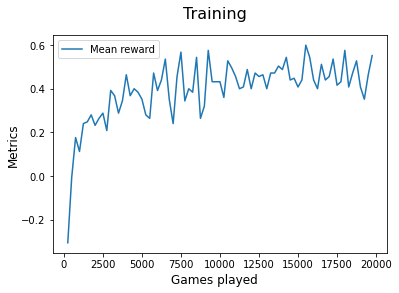

In [31]:
env = NimEnv()
metrics,_=q_learning(env,num_games=20000, eps_q=0.1, gamma= 0.99, verbose=False)
output=[]
output.append(metrics)
single_image_subplots("Training",output)


The learning agent plays against a player that does the best possible move half of the times, whereas the other half of the times it plays a random move. Given that every game the first player is switched, that heaps are randomly generated with a uniform distribution and mathematically is already possible to know who will win among two Opt(0) players just by knowing initial heaps and starting player, the probability of winning for each player is around 0.5 and hence the mean reward would be around 0.0, half of the game won (+1) and half lost (-1). Given that the adversary is Opt(0.5), even when Opt(0) is supposed to lose has a 50% chance that adversary will do a wrong move, so the expect win percentage is 75% and the mean reward is 0.5. Since the learning agent reaches such mean reward, it seems like it really has learned to play with the optimal policy, getting the same mean reward a Opt(0) agent would have reached.

## 2.1.1 Decreasing exploration
One way to make training more efficient is to decrease the exploration level eps over time. If we define eps(n)
to be eps for game number n, then one feasible way to decrease exploration during training is to use
eps(n) = max{eps_min, eps_max(1 −n/n∗)},where eps_min and eps_max are the minimum and maximum values for eps, respectively, and n∗ is the number of
exploratory games and shows how fast eps decreases. For convenience, we assume eps_min = 0.1 and eps_max = 0.8;Use eps(n) as define above and
run different Q-learning agents with different values of n∗ against Opt(0.5) for 20’000 games – switchthe 1st player after every game. Choose several values of n∗ from a reasonably wide interval between 1 to 40’000 – particularly, include n
∗ = 1.
Question 2. Plot average reward for every 250 games during training. Does decreasing eps help training
compared to having a fixed eps? What is the effect of n∗?

In [32]:
env = NimEnv()
output=[]
n_star_values=np.linspace(1,40000,21)
for n_star in n_star_values:
    metrics,_=q_learning(env,num_games=20000, eps_q=0.1, gamma= 0.99, decreasing_eps=True, n_star=n_star, verbose=False)
    output.append(metrics)

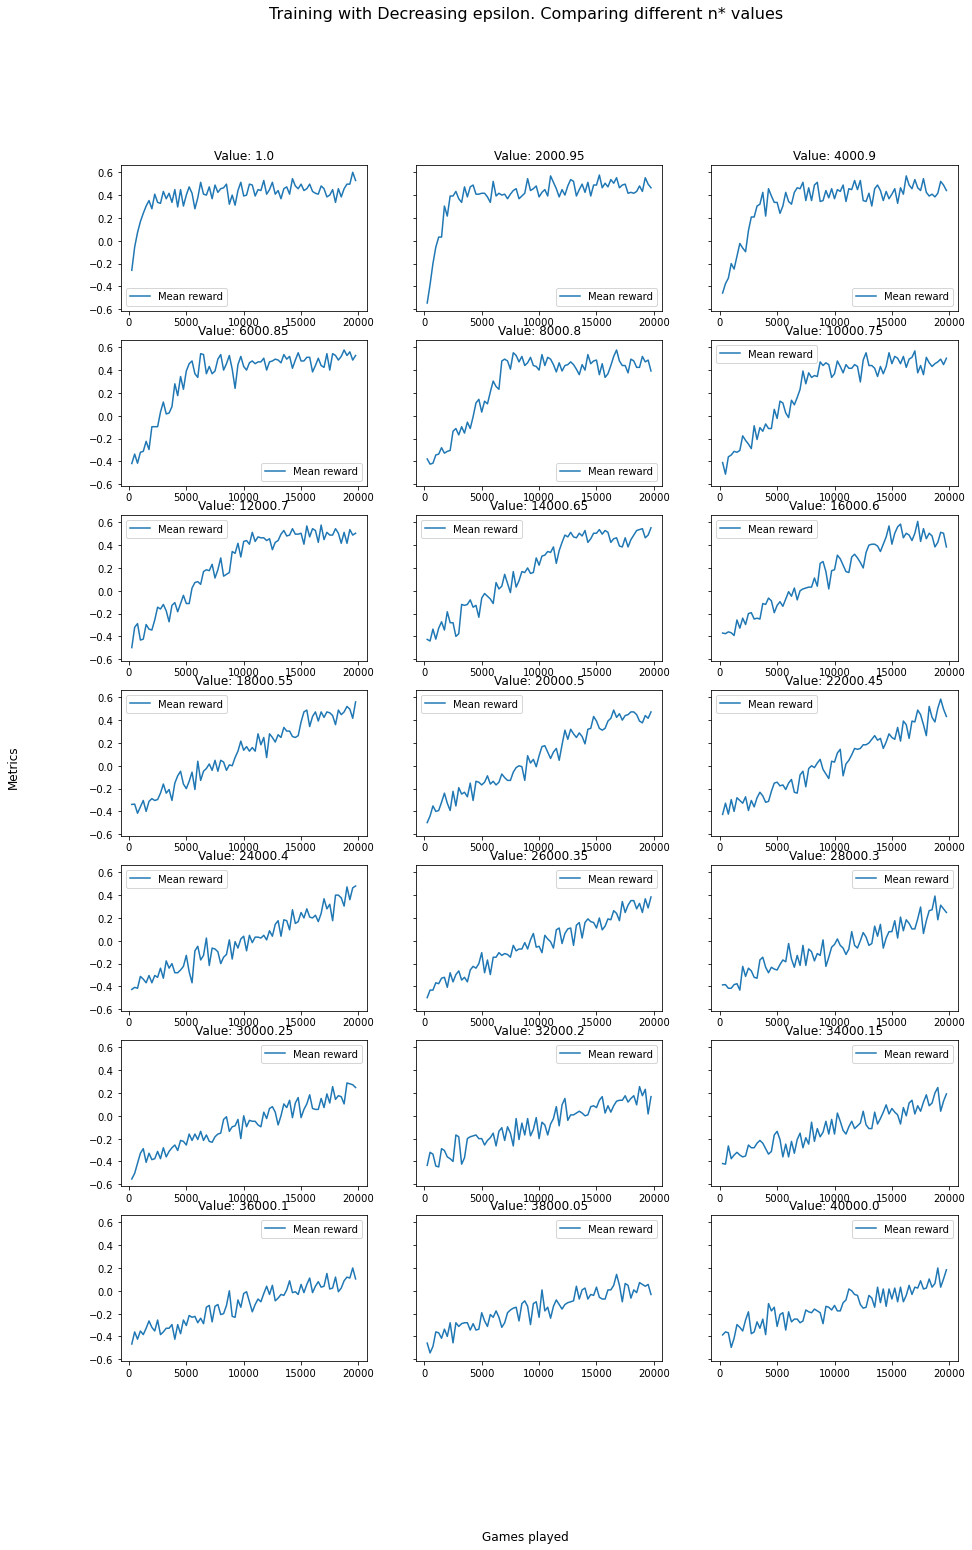

In [33]:
single_image_subplots("Training with Decreasing epsilon. Comparing different n* values",output,n_star_values,3,tot_height=22, tot_width= 15)

It seems like n*=1 gives an extra boost in learning in the beginning, making the mean reward curve grow faster. Higher values seem to have similar results to fixed eps and n*>6000 means a slower and, eventually, worse performance

Question 3. After every 250 games during training, compute the ‘test’ Mopt and Mrand for your agents
– when measuring the ‘test’ performance, put eps = 0 and do not update the Q-values. Plot Mopt and
Mrand over time. Describe the differences and the similarities between these curves and the ones of the
previous question.

M_opt/rand = (N_win - N_win)/ N_tot

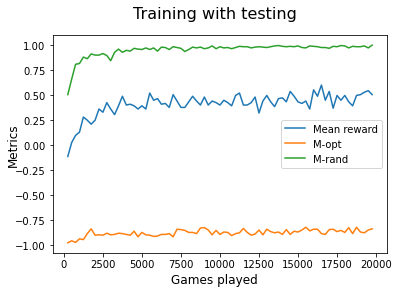

In [34]:
env = NimEnv()
metrics,_=q_learning(env,num_games=20000, eps_q=0.1, gamma= 0.99, test=True, verbose=False)
output=[]
output.append(metrics)
single_image_subplots("Training with testing",output)

The learning agent has certainly learned something, since it always manages to beat a random player. On the other hand it loses around 3 out of 4 times against Opt(0), maybe because it learned from a Opt(0.5) player that half of the times did a random and likely wrong move

## 2.1.2 Good experts and bad experts
Choose the best value of n∗ that you found in the previous section. Run Q-learning against Opt(eps_opt) for
different values of eps_opt for 20’000 games – switch the 1st player after every game. Choose several values
of eps_opt from a reasonably wide interval between 0 to 1 – particularly, include eps_opt = 0.

Question 4. After every 250 games during training, compute the ‘test’ Mopt and Mrand for your agents
– for each value of eps_opt. Plot Mopt and Mrand over time. What do you observe? How can you explain it?


In [35]:
env = NimEnv()
output = []
eps_adv_values = np.linspace(0,1,21)
for eps_adv in eps_adv_values:
    metrics, _=q_learning(env,num_games=20000, eps_adv=eps_adv, gamma= 0.99, decreasing_eps=True, n_star=1, verbose=False, test=True)
    output.append(metrics)

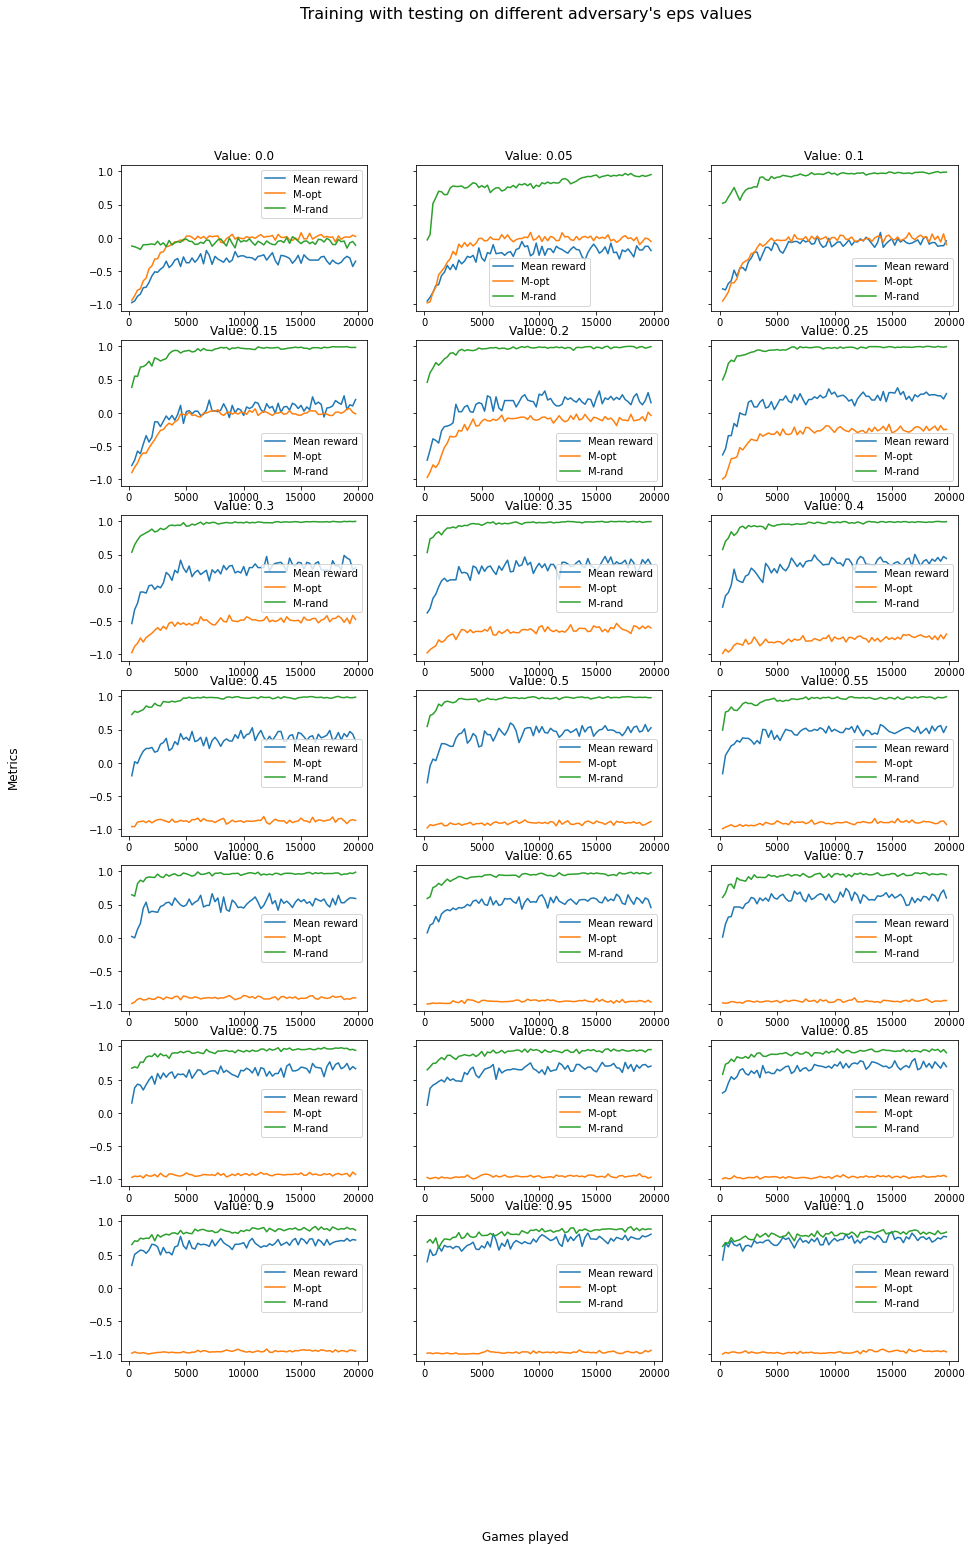

In [36]:
single_image_subplots("Training with testing on different adversary's eps values", output, eps_adv_values, 3, tot_height=22, tot_width=15)

Has seen before, a high eps value for Opt(eps) adversary gives poor learning performances when tested against Opt(0), so a lower eps is needed. 0.1, 0.05 and 0.0 seem the best, but eps=0.0 performs poorly against the random player. I CAN'T REALLY EXPLAIN WHY

## 2.2 Learning by self-practice
In this section, your are supposed to ask whether Q-learning can learn to play Nim by only playing
against itself. For different values of eps ∈ [0, 1), run a Q-learning agent against itself for 20’000 games –
i.e. both players use the same set of Q-values and update the same set of Q-values.

Question 7. After every 250 games during training, compute the ‘test’ Mopt and Mrand for different
values of eps ∈ [0, 1). Does the agent learn to play Nim? What is the effect of eps?

In [37]:
env = NimEnv()
output = []
eps_values=np.linspace(0, 1, 21)
for eps in eps_values:
    metrics, _ = q_learning(env, num_games=20000, eps_q=eps, gamma=0.99, verbose=False, test=True, self_learning=True)
    output.append(metrics)

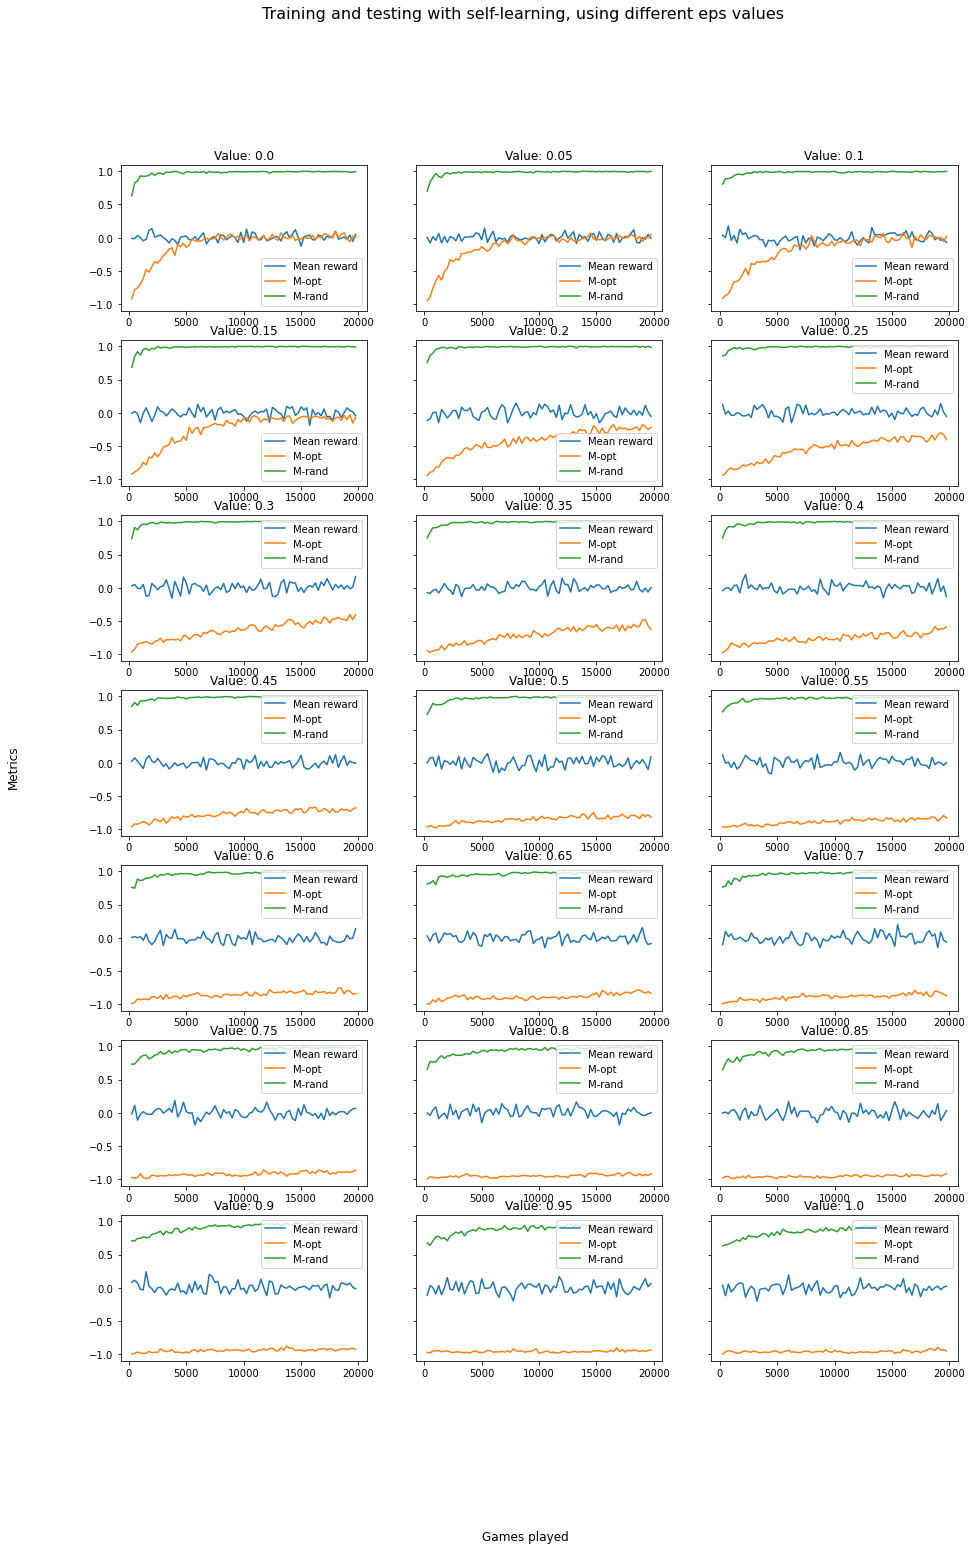

In [38]:
single_image_subplots("Training and testing with self-learning, using different eps values ", output, eps_values, 3, tot_height=22, tot_width=15)

Since the players during training are the same, it makes sense that they have the same probability of winning, hence the mean reward always oscillates around 0.0. Again, the learner always learns something since it's always better than the random player, but only low eps values seem to learn and play as a Opt(0) player. Best eps values are the same as before when learning against a Opt(eps) player and not against itself, but the low M-rand with eps= 0.0 is not there anymore!

Question 8. After every 250 games during training, compute the ‘test’ Mopt and Mrand for your agents.
Does decreasing eps help training compared to having a fixed eps? What is the effect of n∗?

In [39]:
env = NimEnv()
output = []
n_star_values=np.linspace(0, 1, 21)
for n_star in np.linspace(1, 40000, 20):
    metrics,_ = q_learning(env, num_games=20000, gamma=0.99, decreasing_eps=True,
                                        n_star=n_star, verbose=False, test=True, self_learning=True)
    output.append(metrics)

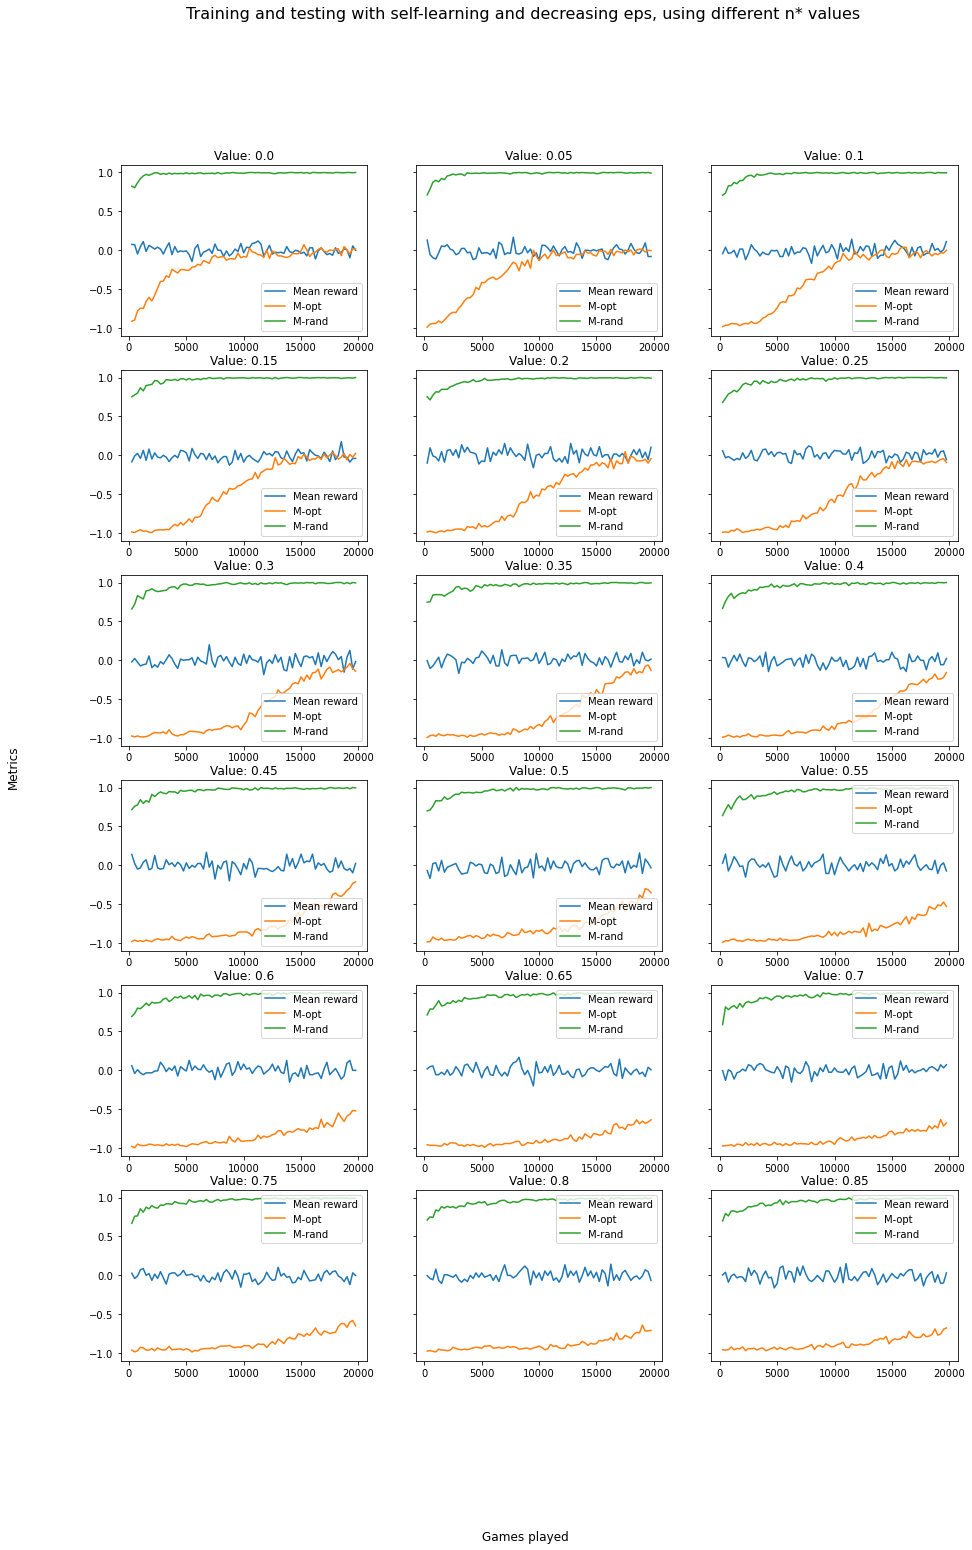

In [40]:
single_image_subplots("Training and testing with self-learning and decreasing eps, using different n* values ", output, n_star_values, 3, tot_height=22, tot_width=15)

It doesn't seem to help

Question 9. What are the highest values of Mopt and Mrand that you could achieve after playing 20’000
games?
Question 10. For three board arrangements (i.e. states s), visualize Q-values of available actions (e.g.
using heat maps). Does the result make sense? Did the agent learn the game well?

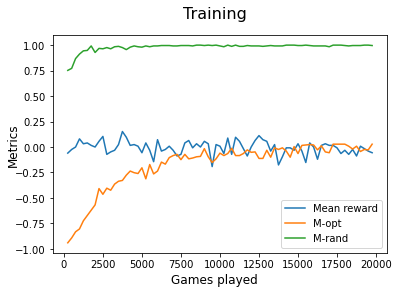

In [41]:
env = NimEnv()
output = []
metrics,q_values = q_learning(env, num_games=20000, gamma=0.99, decreasing_eps=True,
                                    n_star=1, verbose=False, test=True, self_learning=True)
output.append(metrics)
single_image_subplots("Training", output)

In [42]:
heaps=[[4,0,0],[1,2,0],[1,0,1]]
for i in range(3):
    state = heaps_to_idx(heaps[i])
    print(heaps[i])
    print(q_values[state])

[4, 0, 0]
[[-0.271     ]
 [ 0.        ]
 [-0.19      ]
 [ 0.99999709]]
[1, 2, 0]
[[-0.61383978]
 [ 0.99      ]
 [-0.98521912]]
[1, 0, 1]
[[-1.]
 [-1.]]


The values make sense: in the first case the move that makes you win instantly has a 0.9 q-value. In the second case two moves makes you lose in the very next move and one doesn't, and such move has a 0.9 q-value. Last case, both moves make you lose and they both have a -1 q-value.Nice!